In [264]:
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


%matplotlib inline



# Question1: Handwriting Recognition using Machine Learning!

In [265]:
theImage = mpimg.imread("Digit/2.jpg")
theImage

array([[  0,   0,   5,  59, 240, 199,   2,   0],
       [  5,   0,  35, 255, 231, 201,  11,   0],
       [  5,   0, 160, 191, 128, 255,   0,   0],
       [  0,  11,  15,  79, 250, 167,   0,  20],
       [ 12,  10, 126, 204, 242,  11,   5,   0],
       [  0, 141, 250, 255,  81,  13,   0,   3],
       [ 16,  35, 225, 248, 254, 166,  92,   0],
       [  0,  11,   0,  54, 173, 255, 138,   0]], dtype=uint8)

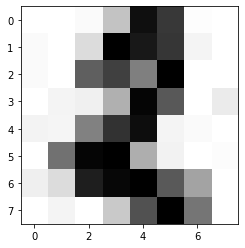

In [266]:
plt.imshow(theImage, cmap=plt.cm.gray_r, interpolation='nearest')

### Have to store 8x8 matrix for all 1797 pictures in an array

In [267]:
store_digits = np.array([[0]*64] * 1797)
store8 = np.array([[[0]*8]*8] * 1797)

In [268]:
store_digits.shape
store8.shape

(1797, 8, 8)

In [269]:
file = 'Digit/' + str(i) + '.jpg'
for i  in range(1797):
    file = 'Digit/' + str(i) + '.jpg'
    store_digits[i] = mpimg.imread(file).reshape(1,-1)

In [277]:
store_digits[0:3]

array([[  0,   2,  88, 217, 158,  21,   0,   0,  16,   0, 228, 236, 166,
        253,  95,   0,   0,  41, 255,  44,  11, 182, 132,   3,  11,  80,
        220,   0,   2, 143, 133,   5,   6,  71, 122,   0,   5, 155, 140,
          0,   0,  76, 194,   0,  26, 207, 105,  15,   0,  18, 255,  83,
        146, 211,   4,   0,   4,   3,  87, 228, 182,   0,   9,   2],
       [  0,   0,  11, 187, 210,  78,   5,   0,  13,   5,   0, 181, 252,
        136,   0,   2,   0,   1,  56, 232, 255, 104,   5,   3,   0, 118,
        244, 240, 255,  11,   8,   0,  18,   0,  11, 255, 242,  57,  12,
          0,   0,   3,  12, 248, 255,  77,   5,   0,   9,   2,  21, 255,
        255, 114,   0,   0,   0,   0,   0, 172, 251, 157,   0,  12],
       [  0,   0,   5,  59, 240, 199,   2,   0,   5,   0,  35, 255, 231,
        201,  11,   0,   5,   0, 160, 191, 128, 255,   0,   0,   0,  11,
         15,  79, 250, 167,   0,  20,  12,  10, 126, 204, 242,  11,   5,
          0,   0, 141, 250, 255,  81,  13,   0,   3,  16,  

### Label all 64 features by putting them in a data frame

In [278]:
pd_data = pd.DataFrame(store_digits)
pd_data


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,2,88,217,158,21,0,0,16,0,...,4,0,4,3,87,228,182,0,9,2
1,0,0,11,187,210,78,5,0,13,5,...,0,0,0,0,0,172,251,157,0,12
2,0,0,5,59,240,199,2,0,5,0,...,92,0,0,11,0,54,173,255,138,0
3,6,0,108,255,213,13,10,0,2,131,...,168,1,0,0,118,217,226,159,0,3
4,0,6,0,34,160,7,7,0,5,0,...,7,0,0,0,2,42,250,51,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,5,0,69,160,198,102,6,0,0,24,...,61,1,3,1,39,219,246,130,13,0
1793,6,0,96,255,206,164,22,0,3,0,...,8,3,9,0,92,246,227,90,0,1
1794,5,0,22,172,242,20,0,0,0,1,...,0,16,3,0,27,152,211,87,21,0
1795,7,0,22,158,114,0,8,2,0,6,...,39,0,12,0,83,185,255,196,0,7


In [279]:
df  = pd.read_csv("label.csv")
df

,name of the file,digit label
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
...,...,...
1792,1792,9
1793,1793,0
1794,1794,8
1795,1795,9


### Create label column and create testing/training split

In [280]:
y = df["digit label"]

In [281]:
X_train, X_test, y_train, y_test = train_test_split(store_digits, y, test_size=0.1, random_state=2)

### Predict using Random Forest

In [282]:
my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)

In [283]:
my_RandomForest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=19, random_state=2)

In [284]:
rf_predict = my_RandomForest.predict(X_test)

In [285]:
rf_score = accuracy_score(y_test, rf_predict)
print(rf_score)

0.9277777777777778


### Hold what images are misclassified and print them

In [286]:
misclass = np.array([0]*180 )

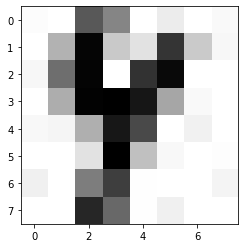

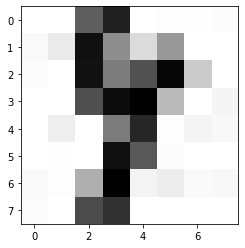

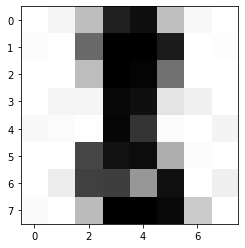

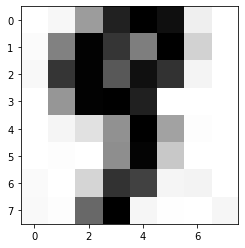

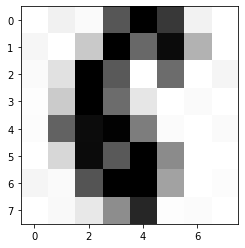

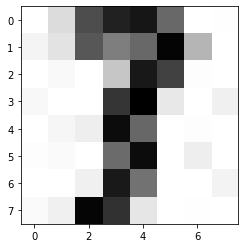

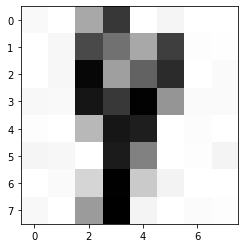

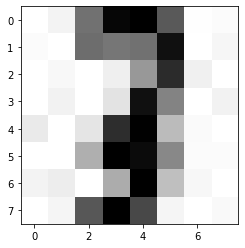

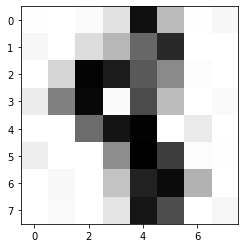

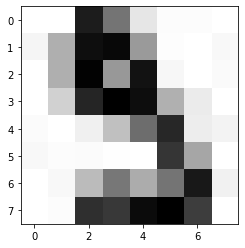

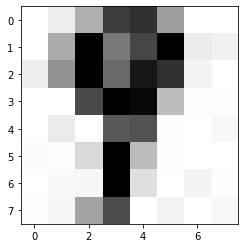

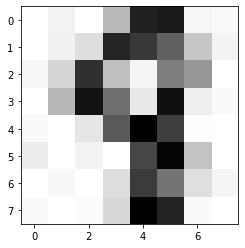

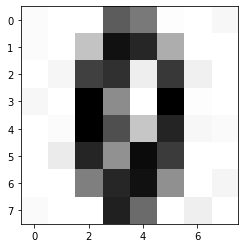

In [292]:

for i in range(len(X_test)):
    if rf_predict[i] != y_test.iloc[i]:
        misclass[i] = rf_predict[i]
        plt.imshow(X_test.reshape(180,8,8)[i], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.show()
